<a href="https://colab.research.google.com/github/cinthia005/Lab-PDI/blob/main/ExMC_PDI_2062979.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Examen Medio Curso - Procesamiento Digital de Imágenes**
Cinthia Janeth Pecina Hernández 2062979 IB

**Ejercicio 1: Segmentación y Clustering**

=== EJERCICIO 1: SEGMENTACIÓN Y CLUSTERING ===


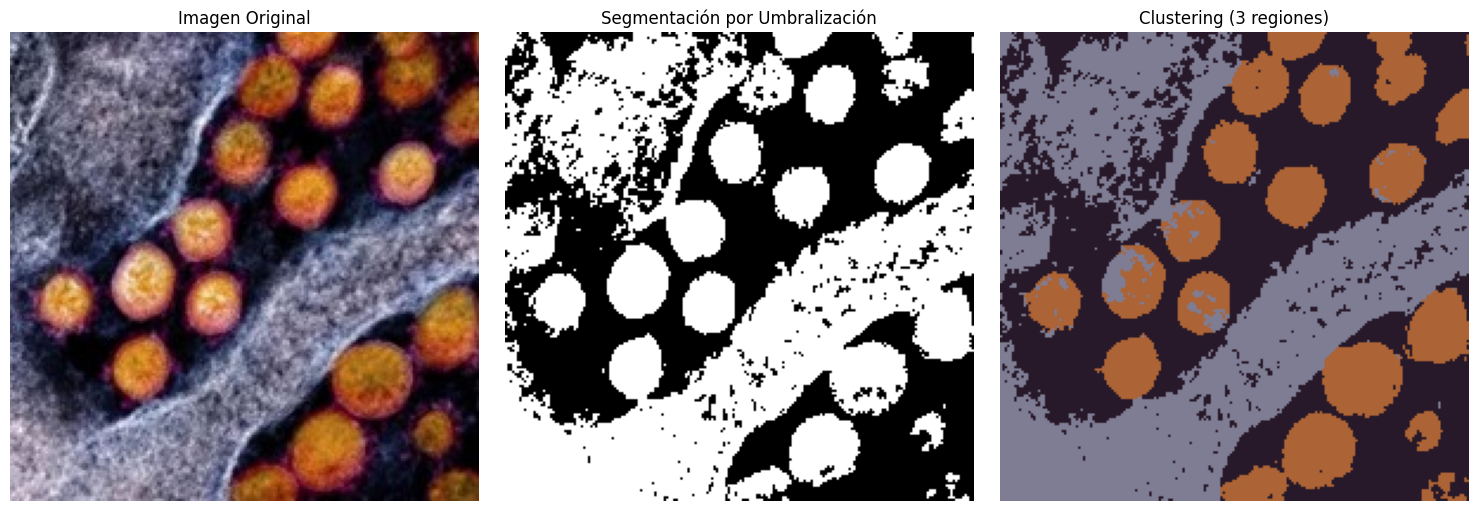


ANÁLISIS DE DIFERENCIAS:
• Umbralización: Produce una separación binaria (fondo vs objeto)
• Clustering: Identifica múltiples grupos basados en similitud de color
• El clustering puede revelar subestructuras no visibles con umbralización simple


In [ ]:
# Librerias usadas
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def ejercicio1_segmentacion_clustering():
    print("=== EJERCICIO 1: SEGMENTACIÓN Y CLUSTERING ===")

    # Se carga la imagen del virus en jpg
    imagen = cv2.imread('virus.jpg')
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Se convierte la imagen a escala de grises
    gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

    # 1. Segmentación por umbralización
    _, umbral = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 2. Clustering (K-means) para 3 regiones
    # Reformatear la imagen para clustering
    datos = imagen_rgb.reshape((-1, 3))
    datos = np.float32(datos)

    # Se aplica K-means
    criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, etiquetas, centros = cv2.kmeans(datos, 3, None, criterio, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convierte de vuelta a imagen
    centros = np.uint8(centros)
    imagen_cluster = centros[etiquetas.flatten()]
    imagen_cluster = imagen_cluster.reshape(imagen_rgb.shape)

    # 3. Panel comparativo
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(imagen_rgb)
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(umbral, cmap='gray')
    plt.title('Segmentación por Umbralización')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(imagen_cluster)
    plt.title('Clustering (3 regiones)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # 4. Análisis de diferencias
    print("\nANÁLISIS DE DIFERENCIAS:")
    print("• Umbralización: Produce una separación binaria (fondo vs objeto)")
    print("• Clustering: Identifica múltiples grupos basados en similitud de color")
    print("• El clustering puede revelar subestructuras no visibles con umbralización simple")

# Ejecutar ejercicio 1
ejercicio1_segmentacion_clustering()

**Ejercicio 2: Histogramas y Mejora de Contraste**


Dimensiones de la imagen: (1080, 1920)
Valor mínimo de gris: 0
Valor máximo de gris: 255


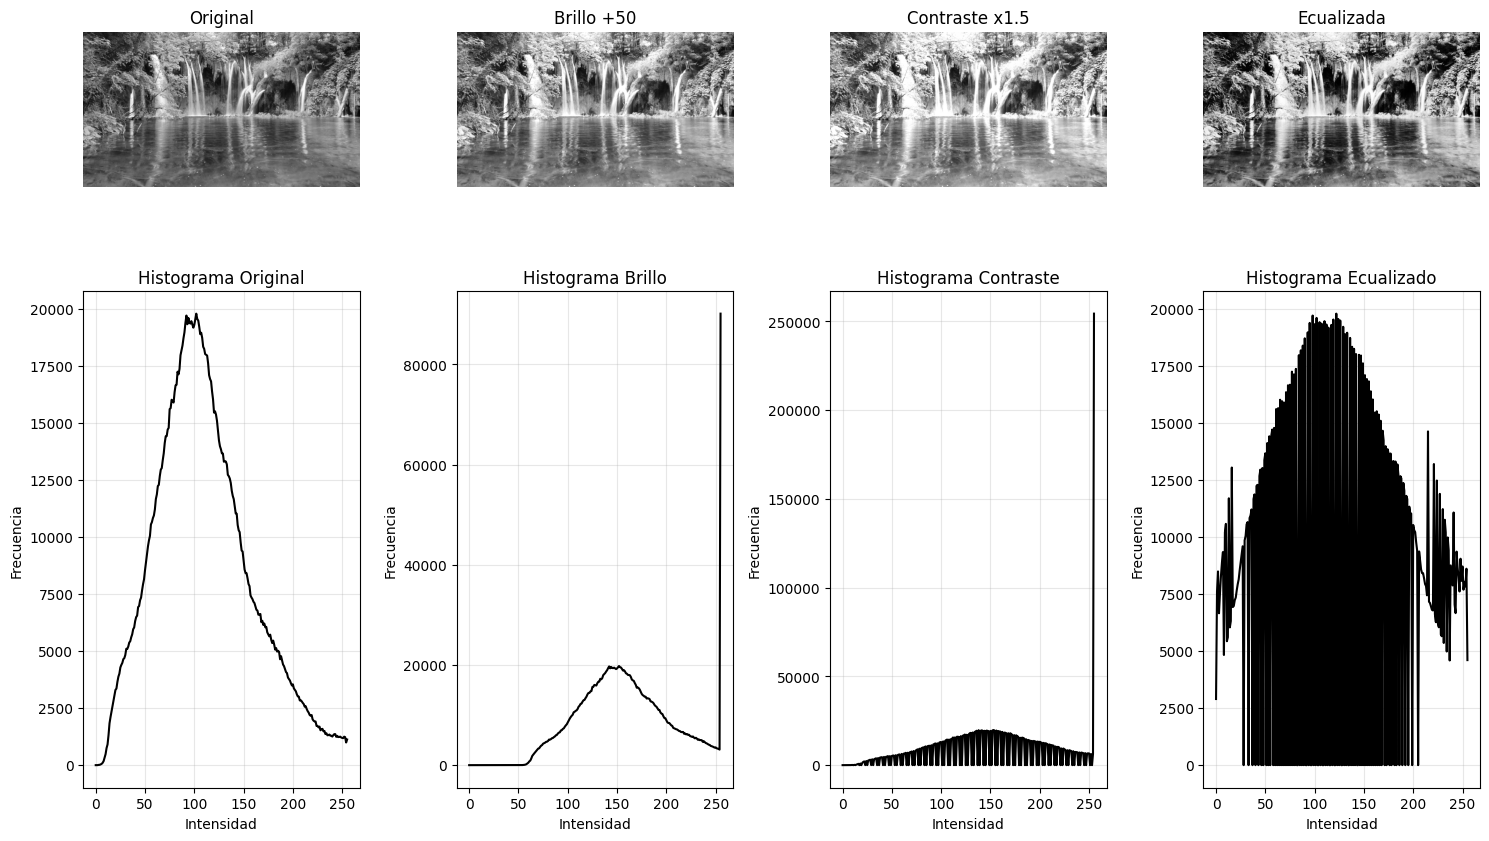


=== ANÁLISIS ESTADÍSTICO ===
Original: Media=110.2, Desviación=47.9
Brillo: Media=159.3, Desviación=45.8
Contraste: Media=159.9, Desviación=61.5
Ecualizada: Media=128.3, Desviación=73.5


In [6]:
# Librerias usadas
import cv2
import numpy as np
import matplotlib.pyplot as plt

def procesamiento_imagen_completo():
    # Carga de imagen libre
    img_path = 'imagen_libre.jpg'
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Se verifica si la imagen se cargó, si no error
    if img_gray is None:
        print("Error: No se pudo cargar la imagen. Verifica la ruta del archivo.")
        return

    # Se obtienen dimensiones
    img_gray_shape = img_gray.shape
    img_gray_min = img_gray.min()
    img_gray_max = img_gray.max()

    print(f'Dimensiones de la imagen: {img_gray_shape}')
    print(f'Valor mínimo de gris: {img_gray_min}')
    print(f'Valor máximo de gris: {img_gray_max}')

    # 1. Filtro Gaussiano
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

    # 2. Histograma original
    hist_original = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

    # 3. Aumento de brillo
    brillo = cv2.add(img_gray, 50)
    hist_brillo = cv2.calcHist([brillo], [0], None, [256], [0, 256])

    # 4. Mejora de contraste
    contraste = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
    hist_contraste = cv2.calcHist([contraste], [0], None, [256], [0, 256])

    # 5. Ecualización de histograma
    ecualizada = cv2.equalizeHist(img_gray)
    hist_ecualizada = cv2.calcHist([ecualizada], [0], None, [256], [0, 256])

    # Se muestran resultados
    plt.figure(figsize=(15, 10))

    # Visualización Fila 1: Imágenes
    imagenes = [
        (img_gray, 'Original'),
        (brillo, 'Brillo +50'),
        (contraste, 'Contraste x1.5'),
        (ecualizada, 'Ecualizada')
    ]

    for i, (img, title) in enumerate(imagenes):
        plt.subplot(2, 4, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')

    # Fila 2: Histogramas
    histogramas = [
        (hist_original, 'Histograma Original'),
        (hist_brillo, 'Histograma Brillo'),
        (hist_contraste, 'Histograma Contraste'),
        (hist_ecualizada, 'Histograma Ecualizado')
    ]

    for i, (hist, title) in enumerate(histogramas):
        plt.subplot(2, 4, i+5)
        plt.plot(hist, color='black')
        plt.title(title)
        plt.xlabel('Intensidad')
        plt.ylabel('Frecuencia')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Análisis estadístico
    print("\n=== ANÁLISIS ESTADÍSTICO ===")
    transformaciones = {
        'Original': img_gray,
        'Brillo': brillo,
        'Contraste': contraste,
        'Ecualizada': ecualizada
    }

    for nombre, img in transformaciones.items():
        media = np.mean(img)
        std = np.std(img)
        print(f"{nombre}: Media={media:.1f}, Desviación={std:.1f}")

# Ejecutar la función principal
procesamiento_imagen_completo()

**Ejercicio 3: Transformaciones y filtrado**

=== EJERCICIO 3: TRANSFORMACIONES GEOMÉTRICAS Y FILTRO SOBEL ===
Tamaño original: 224x280
Tamaño 350%: 784x980
Tamaño 150%: 336x420
Tamaño 50%: 112x140


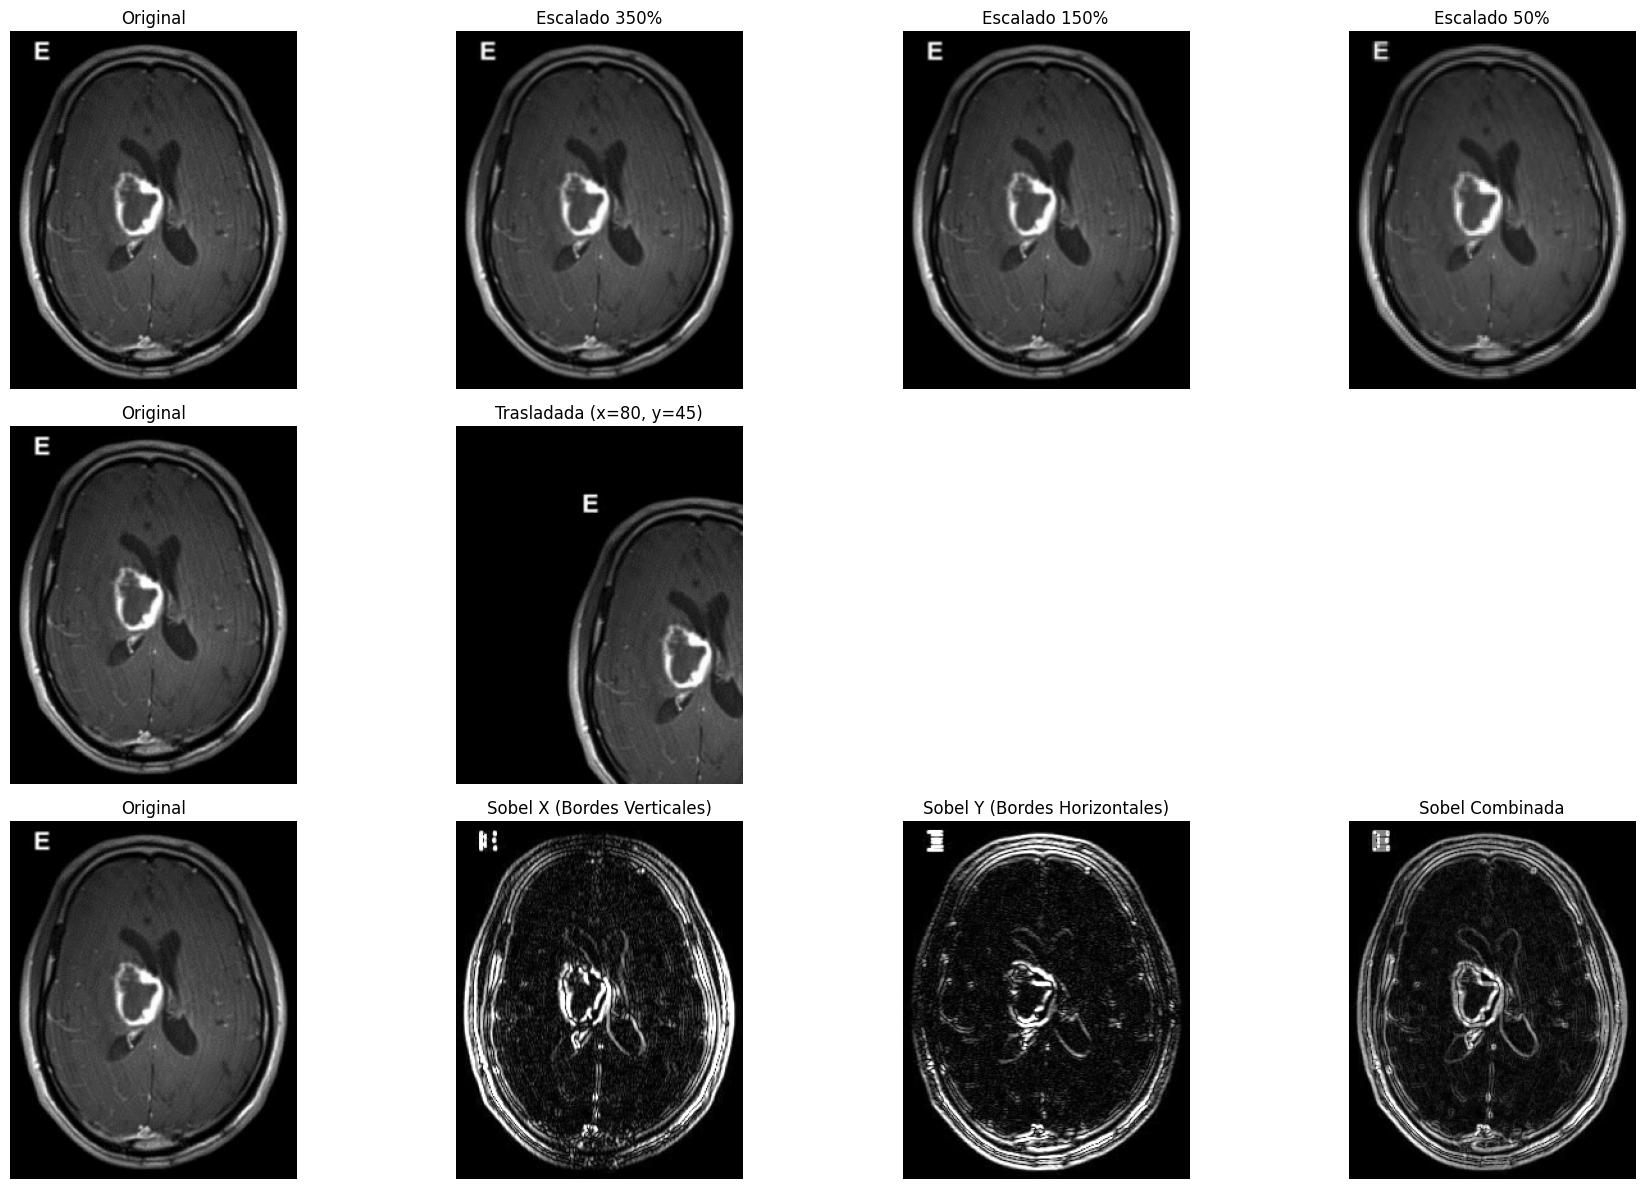


ANÁLISIS DE RESULTADOS:
• Escalado:
  - 350%: Aumenta el tamaño pero puede aparecer pixelación
  - 150%: Equilibrio entre aumento de tamaño y calidad
  - 50%: Reduce tamaño manteniendo buena calidad

• Traslación:
  - Desplaza la imagen 80px derecha y 45px abajo
  - Las áreas que salen del frame se pierden

• Filtro Sobel:
  - Sobel X: Detecta bordes verticales, cambios en X
  - Sobel Y: Detecta bordes horizontales, cambios en Y
  - Combinada: Muestra la magnitud total del gradiente


In [5]:
# Librerias usadas
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ejercicio3_transformaciones_sobel():
    print("=== EJERCICIO 3: TRANSFORMACIONES GEOMÉTRICAS Y FILTRO SOBEL ===")

    # Cargar imagen medica en jpg
    imagen_original = cv2.imread('imagen_medica.jpg')
    if imagen_original is None:
        print("Error: No se pudo cargar la imagen. Verifica la ruta.")
        return

    imagen_rgb = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)
    gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

    # 1. ESCALADO
    alto, ancho = gris.shape

    # al 350%
    escala_350 = (int(ancho * 3.5), int(alto * 3.5))
    escalada_350 = cv2.resize(gris, escala_350, interpolation=cv2.INTER_LINEAR)

    # al 150%
    escala_150 = (int(ancho * 1.5), int(alto * 1.5))
    escalada_150 = cv2.resize(gris, escala_150, interpolation=cv2.INTER_LINEAR)

    # al 50%
    escala_50 = (int(ancho * 0.5), int(alto * 0.5))
    escalada_50 = cv2.resize(gris, escala_50, interpolation=cv2.INTER_LINEAR)

    print(f"Tamaño original: {ancho}x{alto}")
    print(f"Tamaño 350%: {escala_350[0]}x{escala_350[1]}")
    print(f"Tamaño 150%: {escala_150[0]}x{escala_150[1]}")
    print(f"Tamaño 50%: {escala_50[0]}x{escala_50[1]}")

    # 2. TRASLACIÓN (x=80, y=45)
    matriz_traslacion = np.float32([[1, 0, 80], [0, 1, 45]])
    trasladada = cv2.warpAffine(gris, matriz_traslacion, (ancho, alto))

    # 3. FILTRADO con SOBEL
    # Gradiente en X (detección de bordes verticales)
    sobel_x = cv2.Sobel(gris, cv2.CV_64F, 1, 0, ksize=3)
    sobel_x_abs = cv2.convertScaleAbs(sobel_x)

    # Gradiente en Y (detección de bordes horizontales)
    sobel_y = cv2.Sobel(gris, cv2.CV_64F, 0, 1, ksize=3)
    sobel_y_abs = cv2.convertScaleAbs(sobel_y)

    # Combinación de ambos gradientes (magnitud del gradiente)
    sobel_combinada = cv2.addWeighted(sobel_x_abs, 0.5, sobel_y_abs, 0.5, 0)

    # 4. VISUALIZACIÓN PANEL COMPARATIVO
    plt.figure(figsize=(18, 12))

    # Fila 1 con Escalados
    plt.subplot(3, 4, 1)
    plt.imshow(gris, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(3, 4, 2)
    plt.imshow(escalada_350, cmap='gray')
    plt.title('Escalado 350%')
    plt.axis('off')

    plt.subplot(3, 4, 3)
    plt.imshow(escalada_150, cmap='gray')
    plt.title('Escalado 150%')
    plt.axis('off')

    plt.subplot(3, 4, 4)
    plt.imshow(escalada_50, cmap='gray')
    plt.title('Escalado 50%')
    plt.axis('off')

    # Fila 2 con Traslación
    plt.subplot(3, 4, 5)
    plt.imshow(gris, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.imshow(trasladada, cmap='gray')
    plt.title('Trasladada (x=80, y=45)')
    plt.axis('off')

    # Fila 3 con Sobel
    plt.subplot(3, 4, 9)
    plt.imshow(gris, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(3, 4, 10)
    plt.imshow(sobel_x_abs, cmap='gray')
    plt.title('Sobel X (Bordes Verticales)')
    plt.axis('off')

    plt.subplot(3, 4, 11)
    plt.imshow(sobel_y_abs, cmap='gray')
    plt.title('Sobel Y (Bordes Horizontales)')
    plt.axis('off')

    plt.subplot(3, 4, 12)
    plt.imshow(sobel_combinada, cmap='gray')
    plt.title('Sobel Combinada')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # 5. ANÁLISIS DE RESULTADOS
    print("\nANÁLISIS DE RESULTADOS:")
    print("• Escalado:")
    print("  - 350%: Aumenta el tamaño pero puede aparecer pixelación")
    print("  - 150%: Equilibrio entre aumento de tamaño y calidad")
    print("  - 50%: Reduce tamaño manteniendo buena calidad")

    print("\n• Traslación:")
    print("  - Desplaza la imagen 80px derecha y 45px abajo")
    print("  - Las áreas que salen del frame se pierden")

    print("\n• Filtro Sobel:")
    print("  - Sobel X: Detecta bordes verticales, cambios en X")
    print("  - Sobel Y: Detecta bordes horizontales, cambios en Y")
    print("  - Combinada: Muestra la magnitud total del gradiente")

# Ejecutar el ejercicio 3
ejercicio3_transformaciones_sobel()